# Preparing the dataset

In [19]:
#@title Import and download the modules
from google.colab import drive
import os
drive.mount('/content/drive')

URL_path = "/content/drive/MyDrive/turing_college_experiments/14_NLP/dataset/clean_dataset.csv"
Save_path = "/content/drive/MyDrive/turing_college_experiments/14_NLP/dataset/"

""" Import of the modules"""
# Data manipulation and analysis
import pandas as pd
import numpy as np
import json
import random
from collections import Counter
from typing import List, Dict

# Text processing and tokenization
from transformers import PreTrainedTokenizer, BertTokenizer, DistilBertTokenizer
from transformers import BertModel, DistilBertModel

# Visualization
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import plotly.graph_objs as go

# Machine learning and dimensionality reduction
import torch

# NLTK
import re
import random
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# print the whole line
pd.set_option('display.max_colwidth', None)

# colorama of the charts
custom_colors = ['#36CE8A', "#7436F5","#3736F4",   "#36AEF5", "#B336F5", "#f8165e", "#36709A",  "#3672F5", "#7ACE5D"]
gradient_colors = [ "#36CE8A", '#7436F5']
color_palette_custom  = sns.set_palette(custom_colors)
theme_color = sns.color_palette(color_palette_custom, 9)
cmap_theme = LinearSegmentedColormap.from_list('custom_colormap', gradient_colors)
theme_color

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[(0.21176470588235294, 0.807843137254902, 0.5411764705882353),
 (0.4549019607843137, 0.21176470588235294, 0.9607843137254902),
 (0.21568627450980393, 0.21176470588235294, 0.9568627450980393),
 (0.21176470588235294, 0.6823529411764706, 0.9607843137254902),
 (0.7019607843137254, 0.21176470588235294, 0.9607843137254902),
 (0.9725490196078431, 0.08627450980392157, 0.3686274509803922),
 (0.21176470588235294, 0.4392156862745098, 0.6039215686274509),
 (0.21176470588235294, 0.4470588235294118, 0.9607843137254902),
 (0.47843137254901963, 0.807843137254902, 0.36470588235294116)]

In [20]:
#@title Split and import the dataset
dataframe_import = pd.read_csv(URL_path)
dataframe_import.head()

# sample sisze
SAMPLE_PERCENTAGE = 1 #@param
dataframe_clean=dataframe_import.sample(frac=SAMPLE_PERCENTAGE,random_state=42)

# split
train_size = 0.8 #@param
train_dataset=dataframe_clean.sample(frac=train_size,random_state=42)
validation_dataset=dataframe_clean.drop(train_dataset.index).reset_index(drop=True)
train_dataset = train_dataset.reset_index(drop=True)

print("FULL Dataset: {}".format(dataframe_clean.shape))
print("TRAIN Dataset: {}".format(train_dataset.shape))
print("TEST Dataset: {}".format(validation_dataset.shape))
train_dataset.head()

FULL Dataset: (154401, 7)
TRAIN Dataset: (123521, 7)
TEST Dataset: (30880, 7)


,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Rihanna discography Can you please review your position at Wikipedia:Featured list removal candidates/Rihanna discography/archive1? (talk · contribs),0,0,0,0,0,0
1,publisherInteresting. there are some complications. Please email me. You do not have your email enabled. '''''',0,0,0,0,0,0
2,TOTALITARIAN GOVERNMENT THAT SHOULD BE VIOLENTLY OVERTHROWN AND WIPED OFF THE FACE OF THE EARTH,0,0,0,0,0,0
3,"""what a merry-go-around, and it will only end when Wikipedia Administration decides to enforce its policies regarding wikistalking, cyberstalking, malicious sockpuppetry, and so forth. Good Ol'Snocrates' reply here is as if a woman said """"hey officer! there's the man who stole my purse!"""" and the thief (Good Ol'SnocZop) replies, """"officer! that woman just accused me of stealing her purse! She's been saying that, ever since I stole her purse!"""" And so then the police officer turns on his heel and walks away. Would be funny as Phuket Beer if it were a Monty Python skit, like this one. But it's not a skit, it's real-life, and makes Wikipedia Administration seem duncelike. Do you all realize that GoodOl """"Gollum"""" Snocrates has managed to ban and openly harass the only two Wikipedia editors of the TL and CofCTL articles who are actually members of the church, and who both were award-winning newspaper editors-in-chief in the 1980s? and one of them created the TL article for Christ's sake! (literally). Exactly who did Snoc have to touch to get that pass? And do you realize he shows all the characteristics of a genuine arsonist? A serial and anonymous churchburner? Figure it out, kids! SnocZop has done infinitely more damage to the good people in the Temple Lot church (and there are a few in the laity) than anyone else ever has. """,0,0,0,0,0,0
4,"""There is no need for the term """"militant"""" in this context. There already exists satisfactory terminology for this sort of thing. Terrorists are civilians who attack civilians. Partisans are civilians who organize and fight soldiers. Soldiers are government employed fighters. 'Militant', honestly, could mean any of those things.""",0,0,0,0,0,0


In [21]:
train_dataset.columns

Index(['comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

Now, we will sample data from the three classes with lower predictability and extract those tables to generate synthetic data.

In [69]:
#@title Filtering the data for the syntetic creation

"""
severe_toxic comments
"""
filter_data = train_dataset[train_dataset["severe_toxic"] == 1]
save_document_severe_toxic = filter_data["comment_text"]
full_path = os.path.join(Save_path, "sample_severe_toxic.csv")
save_document_severe_toxic.to_csv(full_path, index=False)

"""
threat comments
"""
filter_data = train_dataset[train_dataset["threat"] == 1]
save_document_threat = filter_data["comment_text"]
full_path = os.path.join(Save_path, "sample_threat.csv")
save_document_threat.to_csv(full_path, index=False)

"""
identity_hate comments
"""
filter_data = train_dataset[train_dataset["identity_hate"] == 1]
save_document_identity_hate = filter_data["comment_text"]
full_path = os.path.join(Save_path, "sample_identity_hate.csv")
save_document_identity_hate.to_csv(full_path, index=False)
save_document_identity_hate.head(2)

,comment_text
61,"Dont give a fuck, russian murdering filth!"
67,HELLO ALANHELLO ALLAN HELLO. GO HAVE GAY SEX.


We will recheck the dataset's balance to determine whether the proportions remain consistent or if we can identify any changes.

In [23]:
#@title Filtering the data for the syntetic creation
def proportion_balance_classes(names: pd.Index, values: np.ndarray) -> None:
    """We plot the proportion of each class in each row."""

    plt.figure(figsize=(15, 4))
    ax = sns.barplot(x=names, y=values, alpha=0.8)
    plt.title("# per class")
    plt.ylabel('# of Occurrences', fontsize=12)
    plt.xlabel('Type', fontsize=12)

    rects = ax.patches
    for rect, label in zip(rects, values):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 5, f'{label:.2f}', ha='center', va='bottom')

    plt.show()

    return

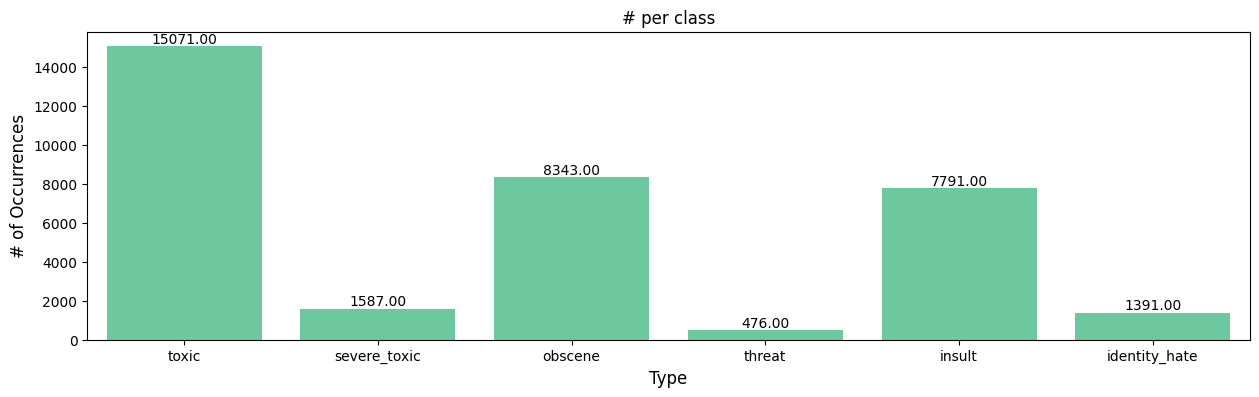

In [24]:
target_y =dataframe_import.iloc[:,1:].sum()
proportion_balance_classes(target_y.index, target_y.values)

We can extract the most repited words from those three categories so we could create syntetic data

# word sampling

In [98]:
#@title Words most repetitive for syntetic data

def words_sampling_n_top(single_line_text: str, number_top_words: int) -> list:
    """Sample the most repetitive words and return a random selection from the top N words"""

    # Extract and filter the words
    words = re.findall(r'\b\w+\b', single_line_text)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]

    # Count word frequencies
    word_counts = Counter(filtered_words)
    top_n_words = word_counts.most_common(number_top_words)
    sampler = []
    for word in top_n_words:
        sampler.append(word[0])

    # Output the top words and the sampled words
    print(f"Top {number_top_words} Words by Frequency: {top_n_words}")
    print(f"Sampled Words: {sampler}")

    return sampler

# Example usage
top_words = 50 #@param

single_line_text = " ".join(save_document_severe_toxic.astype(str).values.flatten())
word_repeated_severe_toxic = words_sampling_n_top(single_line_text, number_top_words=top_words)

single_line_text = " ".join(save_document_threat.astype(str).values.flatten())
word_repeated_threat = words_sampling_n_top(single_line_text, number_top_words=top_words)

single_line_text = " ".join(save_document_identity_hate.astype(str).values.flatten())
word_repeated_identity_hate = words_sampling_n_top(single_line_text, number_top_words=top_words)

Top 50 Words by Frequency: [('YOU', 3727), ('I', 2770), ('fuck', 2632), ('FUCK', 2502), ('SHIT', 1329), ('SUCK', 1217), ('ass', 1179), ('THE', 1162), ('You', 1026), ('faggot', 884), ('DIE', 793), ('MY', 771), ('Fuck', 668), ('FUCKING', 660), ('u', 641), ('YOUR', 633), ('fucksex', 624), ('yourselfgo', 621), ('ASS', 591), ('IN', 584), ('U', 569), ('FAGGOT', 567), ('NIGGER', 532), ('A', 529), ('WILL', 507), ('ARE', 495), ('IS', 493), ('shit', 471), ('sucks', 468), ('D', 438), ('WIKIPEDIA', 435), ('HUGE', 419), ('fucking', 399), ('bitch', 395), ('bastard', 379), ('BITCH', 376), ('UP', 376), ('gay', 369), ('OFFFUCK', 360), ('DOG', 360), ('RAPE', 359), ('SHUT', 356), ('Pro', 348), ('Hanibal911You', 348), ('Assad', 347), ('ALL', 346), ('ANAL', 342), ('bitches', 339), ('Go', 337), ('piece', 337)]
Sampled Words: ['YOU', 'I', 'fuck', 'FUCK', 'SHIT', 'SUCK', 'ass', 'THE', 'You', 'faggot', 'DIE', 'MY', 'Fuck', 'FUCKING', 'u', 'YOUR', 'fucksex', 'yourselfgo', 'ASS', 'IN', 'U', 'FAGGOT', 'NIGGER', '

We review the words manually and  then we take out those values that does not make any sense.

In [121]:
target_groups_identity_hate = [
    "immigrant", "refugee", "black person", "Muslim", "Jew", "Mexicans", "gay",
    "nigger", "fat", "stupid", "nigga" "jewish", "homosexual"
    "trans person", "Asian", "LGBTQ+", "transsexual", "NIGGER", 'FAT', 'JEW',
    'gay',  'niggas',  'bitch',  'Jewish',  'SPANISH',
]

target_groups_threat = [
        'rape' ,      'asshole' ,   'bitch ' ,    'fucker' ,    'die' ,
        'raped' ,    'bastard ' ,    'DIE ' ,  'FUCKIN KILL' ,     'NIGGAZ' ,
        'DIEDIE', 'kill',  'KILL',  'murder', 'rape', 'kill', 'murder', 'die', 'stab',
        'shoot', 'lynch', 'burn', 'strangle', 'asshole',
        'bitch', 'fucker', 'threaten', 'hurt', 'harm',
        'abuse', 'torture', 'attack', 'beat', 'destroy'
]


target_groups_severe_toxic = [
        'mother ass dirty whore',   'FAGGOT',   'FUCK',   'RAPE ANAL',
        'GAY ASS',   'CUNT',   'SHIT',    'penis',   'pussy',   'ass Fuck',
        'COCKSUCKER',   'bitches',    'cock',     'fuck',     'fucksex',
        'FAT DICK', "IDIOT", 'faggot', 'SUCK', 'ass', 'fucksex', 'shit',
        'sucks',
]

identity_hate_speech_samples = [
    "No one wants your kind here, disgusting {}!",
    "You {} are a stain on humanity. Just leave!",
    "The world would be so much better without {} like you.",
    "It’s people like you, {}, that ruin everything for the rest of us.",
    "Go crawl back to your hole, {}. You’re not welcome here.",
    "How can anyone tolerate {}? You’re a disgrace!",
    "{} don’t deserve any respect. You’re all the same.",
    "This place is for real people, not worthless {}.",
    "Stop pretending to matter, {}. Nobody cares about you.",
    "{} like you make me sick. Just disappear.",
    "Why are {} even allowed to exist? It’s absurd.",
    "I wish the world was free of disgusting {}.",
    "You {} are the reason we can’t have anything good.",
    "Keep your {} nonsense out of my sight.",
    "The only thing {} are good for is ruining lives.",
    "Nothing will change until {} are dealt with.",
    "If only we could get rid of {} like you.",
    "{} bring nothing but trouble wherever they go.",
    "You {} are nothing but a curse on this world.",
    "No one wants your kind here, disgusting {}!",
    "You {} are a stain on humanity. Just leave!",
    "The world would be so much better without {} like you.",
    "It’s people like you, {}, that ruin everything for the rest of us.",
    "Go crawl back to your hole, {}. You’re not welcome here.",
    "How can anyone tolerate {}? You’re a disgrace!",
    "{} don’t deserve any respect. You’re all the same.",
    "This place is for real people, not worthless {}.",
    "Stop pretending to matter, {}. Nobody cares about you.",
    "{} like you make me sick. Just disappear.",
    "Why are {} even allowed to exist? It’s absurd.",
    "I wish the world was free of disgusting {}.",
    "You {} are the reason we can’t have anything good.",
    "Keep your {} nonsense out of my sight.",
    "The only thing {} are good for is ruining lives.",
    "Nothing will change until {} are dealt with.",
    "If only we could get rid of {} like you.",
    "{} bring nothing but trouble wherever they go.",
    "You {} are nothing but a curse on this world.",
    "No one wants your kind here, disgusting {}!",
    "You {} are a stain on humanity. Just leave!",
    "The world would be so much better without {} like you.",
    "It’s people like you, {}, that ruin everything for the rest of us.",
    "Go crawl back to your hole, {}. You’re not welcome here.",
    "How can anyone tolerate {}? You’re a disgrace!",
    "Refugees don’t deserve any respect. You’re all the same.",
    "This place is for real people, not worthless {}.",
    "Stop pretending to matter, {}. Nobody cares about you.",
    "{} like you make me sick. Just disappear.",
    "Why are {} even allowed to exist? It’s absurd.",
    "I wish the world was free of disgusting {}.",
    "You {} are the reason we can’t have anything good.",
    "Keep your {} nonsense out of my sight.",
    "The only thing {} are good for is ruining lives.",
    "Nothing will change until {} are dealt with.",
    "If only we could get rid of {} like you.",
    "{} bring nothing but trouble wherever they go.",
    "You {} are nothing but a curse on this world.",
    "No one wants your kind here, disgusting {}!",
    "You {} are a stain on humanity. Just leave!",
    "The world would be so much better without {} like you.",
    "It’s people like you, {}, that ruin everything for the rest of us.",
    "Go crawl back to your hole, {}. You’re not welcome here.",
    "How can anyone tolerate {}? You’re a disgrace!",
    "Gays don’t deserve any respect. You’re all the same.",
    "This place is for real people, not worthless {}.",
    "Stop pretending to matter, {}. Nobody cares about you.",
    "{} like you make me sick. Just disappear.",
    "Why are {} even allowed to exist? It’s absurd.",
    "I wish the world was free of disgusting {}.",
    "You {} are the reason we can’t have anything good.",
    "Keep your {} nonsense out of my sight.",
    "The only thing {} are good for is ruining lives.",
    "Nothing will change until {} are dealt with.",
    "If only we could get rid of {} like you.",
    "{} bring nothing but trouble wherever they go.",
    "You {} are nothing but a curse on this world.",
    "No one wants your kind here, disgusting {}!",
    "You {} are a stain on humanity. Just leave!",
    "The world would be so much better without {} like you.",
    "It’s people like you, {}, that ruin everything for the rest of us.",
    "Go crawl back to your hole, {}. You’re not welcome here.",
    "How can anyone tolerate {}? You’re a disgrace!",
    "Refugees don’t deserve any respect. You’re all the same.",
    "This place is for real people, not worthless {}.",
    "Stop pretending to matter, {}. Nobody cares about you.",
    "{} like you make me sick. Just disappear.",
    "Why are {} even allowed to exist? It’s absurd.",
    "I wish the world was free of disgusting {}.",
    "You {} are the reason we can’t have anything good.",
    "Keep your {} nonsense out of my sight.",
    "The only thing {} are good for is ruining lives.",
    "Nothing will change until {} are dealt with.",
    "If only we could get rid of {} like you.",
    "{} bring nothing but trouble wherever they go.",
    "You {} are nothing but a curse on this world.",
    "No one wants your kind here, disgusting {}!",
    "You {} are a stain on humanity. Just leave!",
    "The world would be so much better without {} like you.",
    "It’s people like you, {}, that ruin everything for the rest of us.",
    "Go crawl back to your hole, {}. You’re not welcome here.",
    "How can anyone tolerate {}? You’re a disgrace!",
    "{} don’t deserve any respect. You’re all the same.",
    "This place is for real people, not worthless {}.",
    "Stop pretending to matter, {}. Nobody cares about you.",
    "{} like you make me sick. Just disappear."
]

severe_toxic_sample = [
    "No one wants your kind here, disgusting {}!",
    "You {} are a stain on humanity. Just leave!",
    "The world would be so much better without {} like you.",
    "It’s people like you, {}, that ruin everything for the rest of us.",
    "Go crawl back to your hole, {}. You’re not welcome here.",
    "How can anyone tolerate {}? You’re a disgrace!",
    "{} is the reason why everything is going wrong.",
    "You should really consider disappearing, {}.",
    "Nobody likes {}, so just stop trying.",
    "You are nothing more than a pathetic {}.",
    "The very sight of you, {}, makes me sick!",
    "Why do {} think they deserve anything?",
    "Everyone knows that {} are the worst.",
    "You can’t even think properly, you {}.",
    "Just go and hide, {}, nobody cares!",
    "Stop ruining things for everyone, {}!",
    "{} have no right to be here.",
    "Your actions prove you’re just another {}.",
    "Only a {} would act like you do.",
    "You are living proof of how terrible {} can be.",
    "No one needs your {} nonsense here.",
    "Take your {} behavior elsewhere.",
    "It’s embarrassing to be associated with {} like you.",
    "You are the epitome of a {}.",
    "Go wallow in your {} misery, far away from us.",
    "The world doesn’t need any more {}.",
    "You’re nothing more than a lowly {}.",
    "If being a {} were an Olympic sport, you'd win gold.",
    "Nobody respects a {}, and you are proof of why.",
    "Aren’t you tired of being a {}?",
    "Do everyone a favor and stop being such a {}.",
    "No one will ever take {} seriously.",
    "{} have a reputation, and you live up to it in the worst way.",
    "You’re as obnoxious as a {} can get.",
    "{} are the definition of what’s wrong with society.",
    "All you {} are the same: selfish and stupid.",
    "The fact that you exist as a {} is baffling.",
    "When will {} learn to just stop?",
    "{} are nothing but trouble, always have been.",
    "Do you even realize how awful {} are?",
    "Every time I see a {}, I think of you.",
    "It’s funny how {} always think they’re right.",
    "{} think they’re so smart, but they’re just pathetic.",
    "Why are you even trying? You’re just a {}.",
    "{} are known for their inability to do anything right.",
    "Your existence as a {} is sad and unnecessary.",
    "{} have ruined everything they’ve touched.",
    "Is there anything more useless than a {}?",
    "The way you act, {} is a good descriptor.",
    "Nobody wants to deal with {} anymore.",
    "{} should be ashamed of what they’ve done.",
    "No matter where you go, you’ll always be a {}.",
    "Nobody trusts a {} like you.",
    "Even {} can’t stand being around you.",
    "You are the living, breathing example of a {}.",
    "Why don’t you just admit you’re a {} and leave?",
    "{} have never done anything worthwhile.",
    "When I see {}, I see failure.",
    "{} think they matter, but they don’t.",
    "You’ve reached new lows, even for a {}.",
    "{} are a plague to be eradicated.",
    "Please, spare us from more {} nonsense.",
    "Even the best of us can’t tolerate {}.",
    "You’re what happens when a {} goes unchecked.",
    "Nobody asked for your {} opinions.",
    "The world would rejoice if {} were gone.",
    "{} are nothing but a hindrance to progress.",
    "The fact that you’re proud of being a {} is laughable.",
    "You embody everything that’s wrong with {}, and then some.",
    "Not even other {} would want to claim you.",
    "Even the most patient person couldn’t handle a {} like you.",
    "No wonder everyone avoids {} like you.",
    "{} only care about themselves, typical.",
    "It’s amazing how {} never take responsibility.",
    "Every time {} opens their mouth, the world gets worse.",
    "{} think they’re better, but they’re just pathetic.",
    "You are the textbook definition of a {}.",
    "I hope you’re happy being a {}.",
    "{} never contribute anything meaningful.",
    "The world doesn’t owe you anything, you {}.",
    "{} always play the victim, it’s ridiculous.",
    "You’re exactly what I’d expect from a {}.",
    "Stop pretending to be more than a {}.",
    "{} are the reason people lose faith in humanity.",
    "It’s hard to believe someone as {} as you exists.",
    "{} always think they’re entitled to everything.",
    "Nobody will ever respect a {}.",
    "{} have nothing worthwhile to offer.",
    "You are the absolute worst example of a {}.",
    "{} are a joke and everyone knows it.",
    "Do you honestly think being a {} is acceptable?",
    "Nobody deserves to deal with a {} like you.",
    "The more I learn about {}, the worse it gets.",
    "{} just keep proving why nobody likes them.",
    "Even among {}, you’re a standout for how awful you are.",
]

threat_sample = [
    "No one wants your kind here, disgusting {}!",
    "You {} are a stain on humanity. Just leave!",
    "The world would be so much better without {} like you.",
    "It’s people like you, {}, that ruin everything for the rest of us.",
    "Go crawl back to your hole, {}. You’re not welcome here.",
    "How can anyone tolerate {}? You’re a disgrace!",
    "Keep running your {} mouth, and see what happens.",
    "{} think they can do whatever they want, but they can’t.",
    "You’re so pathetic, {}, it’s embarrassing.",
    "Even {} wouldn’t stoop as low as you.",
    "{} like you make the internet worse for everyone.",
    "Your existence as a {} is a cosmic joke.",
    "{} are always the first to cry foul when things don’t go their way.",
    "Nobody cares about your {} opinions.",
    "{} are nothing but an annoying buzz in the background.",
    "Your empty threats, {}, are as meaningless as you are.",
    "{} think they’re untouchable, but they’re not.",
    "The world doesn’t need any more {} like you.",
    "You’ve reached new lows, even for a {}.",
    "If being a {} were a sport, you’d take the gold medal.",
    "Your actions scream {} louder than your words.",
    "{} are known for their lack of self-awareness, and you’re no different.",
    "Why are you even trying, {}, when it’s clear you’ll fail?",
    "No one respects a {}, especially not one like you.",
    "It’s people like {}, ruining everything for the rest of us.",
    "You’re the perfect example of why {} are the worst.",
    "{} think they matter, but they don’t.",
    "Take your {} nonsense somewhere else.",
    "{} are a blight on every platform they touch.",
    "Stop pretending to be anything other than a {}.",
    "It’s amazing how {} always make everything about themselves.",
    "You are the living definition of a {}.",
    "{} have always been a source of chaos and misery.",
    "Everyone can see you’re a {}, no need to keep proving it.",
    "Nobody asked for your {} perspective.",
    "{} think their words matter, but they don’t.",
    "Your whole personality screams {}.",
    "The world would rejoice if {} disappeared entirely.",
    "{} are proof that some people just shouldn’t have internet access.",
    "Even other {} probably can’t stand you.",
    "{} will never be more than a footnote in failure.",
    "Every action you take as a {} is laughable.",
    "It’s so typical for a {} to act this way.",
    "{} are the reason everyone else has trust issues.",
    "The fact that you exist, {}, is almost impressive.",
    "{} always think they’re the victim.",
    "Your obsession with being a {} is beyond tiresome.",
    "Even the most patient person couldn’t tolerate a {} like you.",
    "Nobody believes a word you say, {}.",
    "You’re a caricature of a {}, and not even a good one.",
    "{} think threats make them intimidating, but it’s just sad.",
    "There’s no point in engaging with {} like you.",
    "The only thing more pathetic than a {} is your attempt to justify being one.",
    "You’ve outdone yourself, {}, in being insufferable.",
    "{} like you are why comment sections get shut down.",
    "Nobody likes {}, and you’re no exception.",
    "{} should stick to being ignored.",
    "Even when you’re quiet, {}, you’re still unbearable.",
    "You’re exactly what I’d expect from a {}, through and through.",
    "Is there anything more exhausting than a {}?",
    "{} have mastered the art of being annoying.",
    "You’ve turned being a {} into an Olympic-level skill.",
    "Everything you say as a {} makes you look worse.",
    "When I think of {}, your name comes to mind immediately.",
    "It’s no wonder nobody takes {} seriously anymore.",
    "Stop embarrassing yourself, {}, it’s painful to watch.",
    "{} are only good for causing problems.",
    "Your behavior proves why {} should be avoided.",
    "Take your {} attitude and leave.",
    "{} are always quick to blame others.",
    "You couldn’t even succeed at being a {} if you tried.",
    "Nobody wants {} in their lives.",
    "{} never realize how ridiculous they look.",
    "You’re the poster child for what’s wrong with {}",
    "Even your insults are weak, {}, like everything else you do.",
    "Why do {} always resort to such petty nonsense?",
    "Nobody respects {}, and you’re a shining example.",
    "{} can’t even insult people properly.",
    "Your entire personality revolves around being a {}, doesn’t it?",
    "Do the world a favor and stop being a {}.",
    "{} never contribute anything positive.",
    "It’s almost impressive how much of a {} you are.",
    "Nobody will ever take {} seriously, least of all you.",
    "{} are like a broken record: predictable and annoying.",
    "There’s no saving {}, they’re a lost cause.",
    "The fact that {} like you exist is mind-boggling.",
    "If being a {} were an achievement, you’d be at the top.",
    "Nobody asked for your {} perspective, and nobody wants it.",
    "You’ve made it your mission to be the most obnoxious {} possible.",
    "It’s sad how much effort you put into being a{}.",
    "{} only care about making things worse.",
    "There’s nothing redeemable about {}, especially you.",
    "Why do {} always think they’re the exception?",
    "Your obsession with being a {} is exhausting to watch.",
    "{} like you are why rules exist.",
    "Everything about you screams {}, and not in a good way.",
]


# create the sintetic data

In [124]:
def create_sintetic_text_samplers(sentences: List[str], word_insert: List[str], samples_int: int = 1000) -> pd.DataFrame:
    """Create synthetic data using some predefined sentences and a predefined list of target groups."""
    if not sentences:
        raise ValueError("The sentences list is empty.")
    if not word_insert:
        raise ValueError("The word_insert list is empty.")

    samples = []
    for _ in range(samples_int):
        template = random.choice(sentences)
        target = random.choice(word_insert)
        try:
            text = template.format(target)
            samples.append({"text": text})
        except Exception as e:
            print(f"Error formatting template '{template}' with target '{target}': {e}")

    return pd.DataFrame(samples)


# hate_speech_samples_list = list(hate_speech_samples)
sample_identity_hate = create_sintetic_text_samplers(identity_hate_speech_samples, target_groups_identity_hate)
sample_threat = create_sintetic_text_samplers(threat_sample, target_groups_threat)
sample_toxic_sample = create_sintetic_text_samplers(severe_toxic_sample, target_groups_severe_toxic, samples_int=1500)
sample_toxic_sample


,text
0,"It’s people like you, CUNT, that ruin everything for the rest of us."
1,"The world doesn’t owe you anything, you fucksex."
2,mother ass dirty whore have ruined everything they’ve touched.
3,COCKSUCKER never contribute anything meaningful.
4,"Every time FUCK opens their mouth, the world gets worse."
...,...
1495,You are the absolute worst example of a GAY ASS.
1496,"The more I learn about faggot, the worse it gets."
1497,Why don’t you just admit you’re a RAPE ANAL and leave?
1498,You are living proof of how terrible SHIT can be.


In [136]:
sintetic_data = sintetic_data.loc[sintetic_data['severe_toxic'] == 0, "severe_toxic"] = 1
sintetic_data

AttributeError: 'int' object has no attribute 'loc'

In [149]:
sample_identity_hate = create_sintetic_text_samplers(identity_hate_speech_samples, target_groups_identity_hate)
sample_threat = create_sintetic_text_samplers(threat_sample, target_groups_threat)
sample_severe_toxic = create_sintetic_text_samplers(severe_toxic_sample, target_groups_severe_toxic, samples_int=1500)

sample_identity_hate["identity_hate"] = 1
sample_threat["threat"] = 1
sample_severe_toxic["severe_toxic"] = 1


columns_to_add = ['toxic',	'severe_toxic',	'obscene',	'threat',	'insult',	'identity_hate']
for column in columns_to_add:
    if column not in sample_identity_hate.columns:
        sample_identity_hate[column] = 0
    if column not in sample_threat.columns:
        sample_threat[column] = 0
    if column not in sample_severe_toxic.columns:
        sample_severe_toxic[column] = 0


synthetic_data = pd.concat([sample_identity_hate, sample_threat, sample_severe_toxic])
print(synthetic_data.shape)
full_path = os.path.join(Save_path, "synthetic_data.csv")
synthetic_data.to_csv(full_path, index=False)
synthetic_data.head()

(3500, 7)


,text,identity_hate,toxic,severe_toxic,obscene,threat,insult
0,Jew bring nothing but trouble wherever they go.,1,0,0,0,0,0
1,gay bring nothing but trouble wherever they go.,1,0,0,0,0,0
2,LGBTQ+ don’t deserve any respect. You’re all the same.,1,0,0,0,0,0
3,Refugees don’t deserve any respect. You’re all the same.,1,0,0,0,0,0
4,"It’s people like you, Asian, that ruin everything for the rest of us.",1,0,0,0,0,0


# Summary

We have generated synthetic data with the aim of improving model performance. We will now run the same model used in the previous iteration to assess if this new data leads to any performance improvements.
